In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
train = pd.read_csv('Train_Data.csv')
train_labels = pd.read_csv('Train_Labels.csv')
test = pd.read_csv('Test_Data.csv')
test_labels = pd.read_csv('Test_Labels.csv')
original_dataset = pd.concat([train, test])
original_dataset = original_dataset.reset_index()

labels = pd.concat([train_labels, test_labels])
labels = labels.reset_index()
transposed_dataset =original_dataset
labels.drop('index', axis = 1,inplace = True)

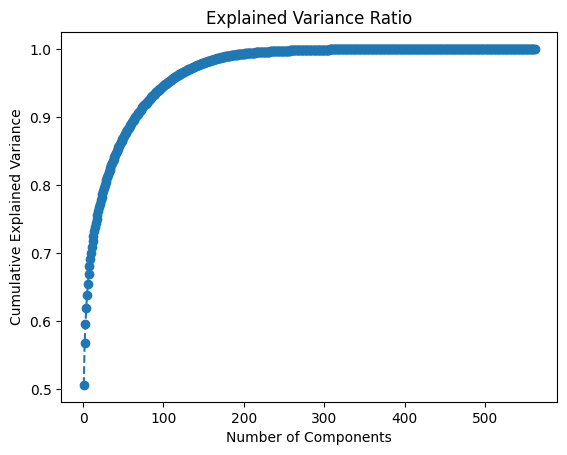

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40
0,-16.376662,2.003189,3.371697,-0.654260,7.825249,-2.692163,2.266215,5.337819,-1.344700,-3.743297,...,-2.019343,0.308339,0.432621,-1.115173,0.549351,-0.389418,0.632328,2.032850,1.469739,-0.547379
1,-15.577852,1.190995,-0.361059,2.745637,4.729690,-1.529166,-0.353544,1.724886,0.008158,0.089749,...,0.879460,-0.396498,0.093801,-0.406181,-1.089588,-0.960185,-0.643624,-0.383381,0.741787,0.904678
2,-15.419660,2.251705,-1.277468,4.000830,4.402892,-0.977923,-0.147523,1.383247,0.204684,-0.760299,...,2.390870,1.123598,1.132451,0.563197,-1.100133,-0.974770,-0.258540,-1.192150,0.744001,-0.445028
3,-15.643481,3.771313,-1.314083,2.804723,3.239264,-0.689692,0.308995,1.831445,0.917384,-1.583390,...,2.527379,1.568965,-0.325661,-0.162851,0.475319,0.436019,-1.064712,-1.107241,-1.049016,0.249829
4,-15.838001,4.447190,-1.843602,3.159060,3.331294,-0.868149,-0.873752,0.170435,0.536894,1.025205,...,0.620523,0.361411,-0.261446,-0.523746,0.040864,0.187410,-0.979609,0.126530,0.961541,-0.452190


In [ ]:
# Separate features (X) and target variable (y), if applicable
X = original_dataset  # Replace 'target_column' with your target column name, if applicable

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio to determine the number of components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Choose the number of components based on the plot or a specific threshold
num_components = 40  # Adjust based on your preference

# Perform PCA with the chosen number of components
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Convert the reduced data to a DataFrame
columns_pca = [f'PC{i}' for i in range(1, num_components + 1)]
X_pca_df = pd.DataFrame(data=X_pca, columns=columns_pca)

# Display the reduced data
X_pca_df.head()


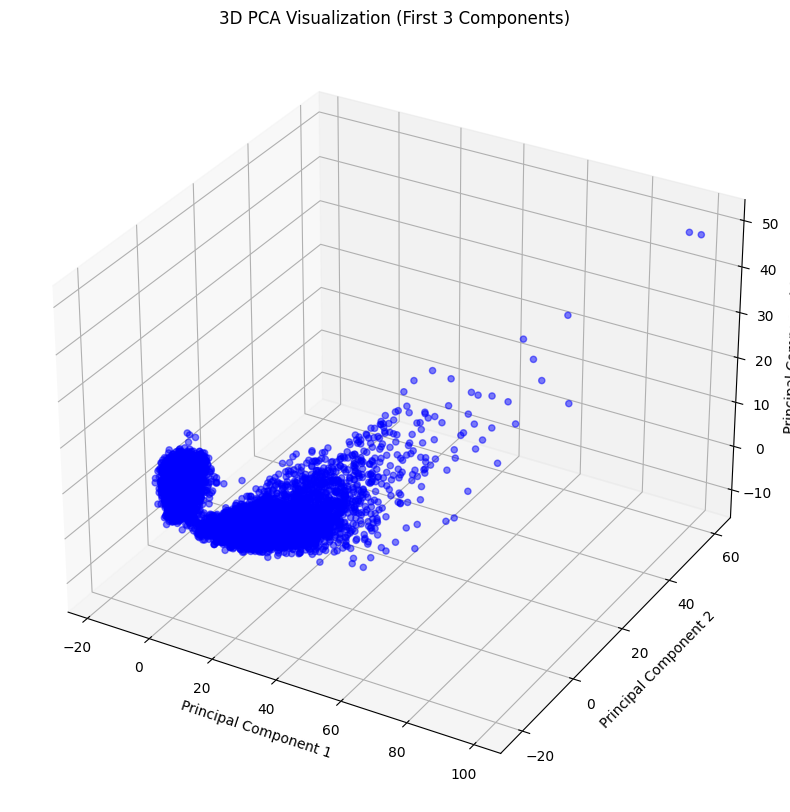

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # Importing this for 3D plotting

# Assume 'original_dataset' is your feature matrix

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(original_dataset)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=40)  # Choose 10 components for 3D plot
X_pca = pca.fit_transform(X_scaled)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c='blue', marker='o', alpha=0.5)

# Set labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Visualization (First 3 Components)')

plt.show()

# Models

In [ ]:
from sklearn.preprocessing import StandardScaler
# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_pca_df, labels, test_size=0.3, random_state=42)
# Initialize the StandardScaler
scaler = StandardScaler()


# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_selected)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test_selected)

# Flatten the labels using ravel()
y_train_flat = y_train.values.ravel()
y_test_flat = y_test.values.ravel()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Initialize SVM classifier
svm_classifier = SVC()

# Initialize Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)

#10 fold cross validation
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
#for GaussianNB
cv_scores1 = cross_val_score(naive_bayes_classifier, X_train_scaled, y_train_flat, cv=k_fold, scoring='accuracy')
y_pred_cv1 = cross_val_predict(naive_bayes_classifier, X_train_scaled, y_train_flat, cv=k_fold)
# Display the accuracy for each fold
for i, score in enumerate(cv_scores1, 1):
    print(f'Fold {i}: Accuracy = {score}')

# Display the mean and standard deviation of the cross-validation scores
print(f'Mean Accuracy of GaussianNB: {np.mean(cv_scores1)}')
print(f'Standard Deviation of GaussianNB: {np.std(cv_scores1)}')


Fold 1: Accuracy = 0.8141470180305131
Fold 2: Accuracy = 0.8196948682385575
Fold 3: Accuracy = 0.8599167822468793
Fold 4: Accuracy = 0.841886269070735
Fold 5: Accuracy = 0.8488210818307905
Fold 6: Accuracy = 0.840499306518724
Fold 7: Accuracy = 0.8349514563106796
Fold 8: Accuracy = 0.8377253814147018
Fold 9: Accuracy = 0.8529819694868238
Fold 10: Accuracy = 0.8069444444444445
Mean Accuracy of GaussianNB: 0.8357568577592849
Standard Deviation of GaussianNB: 0.01634255940020262


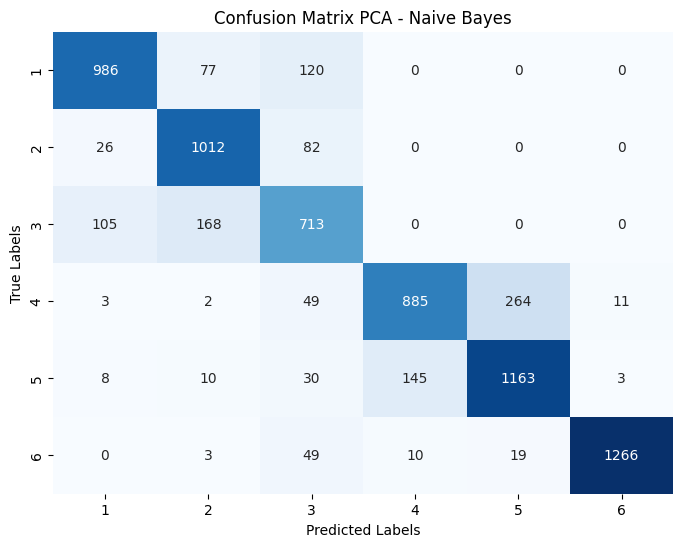

In [ ]:

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train_flat, y_pred_cv1)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_train_flat), yticklabels=np.unique(y_train_flat))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix PCA - Naive Bayes')
plt.show()

In [ ]:
#for SVC
cv_scores2 = cross_val_score(svm_classifier, X_train_scaled, y_train_flat, cv=k_fold, scoring='accuracy')
y_pred_cv2 = cross_val_predict(svm_classifier, X_train_scaled, y_train_flat, cv=k_fold)
# Display the accuracy for each fold
for i, score in enumerate(cv_scores2, 1):
    print(f'Fold {i}: Accuracy = {score}')

# Display the mean and standard deviation of the cross-validation scores
print(f'Mean Accuracy of SVC: {np.mean(cv_scores2)}')
print(f'Standard Deviation OF SVC: {np.std(cv_scores2)}')

Fold 1: Accuracy = 0.9278779472954231
Fold 2: Accuracy = 0.9500693481276006
Fold 3: Accuracy = 0.9445214979195562
Fold 4: Accuracy = 0.9389736477115118
Fold 5: Accuracy = 0.9486823855755895
Fold 6: Accuracy = 0.9486823855755895
Fold 7: Accuracy = 0.9528432732316228
Fold 8: Accuracy = 0.9500693481276006
Fold 9: Accuracy = 0.9514563106796117
Fold 10: Accuracy = 0.9430555555555555
Mean Accuracy of SVC: 0.9456231699799662
Standard Deviation OF SVC: 0.007150702213295416


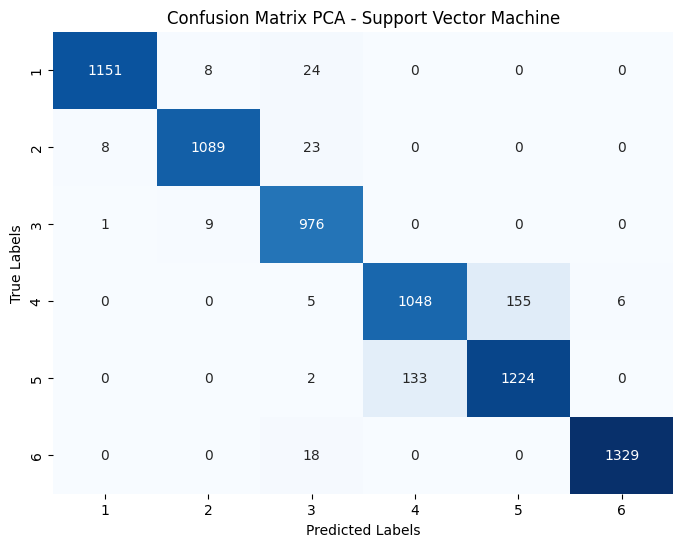

In [ ]:

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train_flat, y_pred_cv2)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_train_flat), yticklabels=np.unique(y_train_flat))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix PCA - Support Vector Machine')
plt.show()

In [ ]:
#for Logistic Regression
cv_scores3 = cross_val_score(logreg_classifier, X_train_scaled, y_train_flat, cv=k_fold, scoring='accuracy')
y_pred_cv3 = cross_val_predict(logreg_classifier, X_train_scaled, y_train_flat, cv=k_fold)
# Display the accuracy for each fold
# Display the accuracy for each fold
for i, score in enumerate(cv_scores3, 1):
    print(f'Fold {i}: Accuracy = {score}')

# Display the mean and standard deviation of the cross-validation scores
print(f'Mean Accuracy of Logistic Regression: {np.mean(cv_scores3)}')
print(f'Standard Deviation OF Logistic Regression: {np.std(cv_scores3)}')

Fold 1: Accuracy = 0.9251040221914009
Fold 2: Accuracy = 0.941747572815534
Fold 3: Accuracy = 0.9403606102635229
Fold 4: Accuracy = 0.9348127600554785
Fold 5: Accuracy = 0.9292649098474342
Fold 6: Accuracy = 0.9542302357836339
Fold 7: Accuracy = 0.9375866851595007
Fold 8: Accuracy = 0.9445214979195562
Fold 9: Accuracy = 0.9348127600554785
Fold 10: Accuracy = 0.9291666666666667
Mean Accuracy of Logistic Regression: 0.9371607720758208
Standard Deviation OF Logistic Regression: 0.00812187099085103


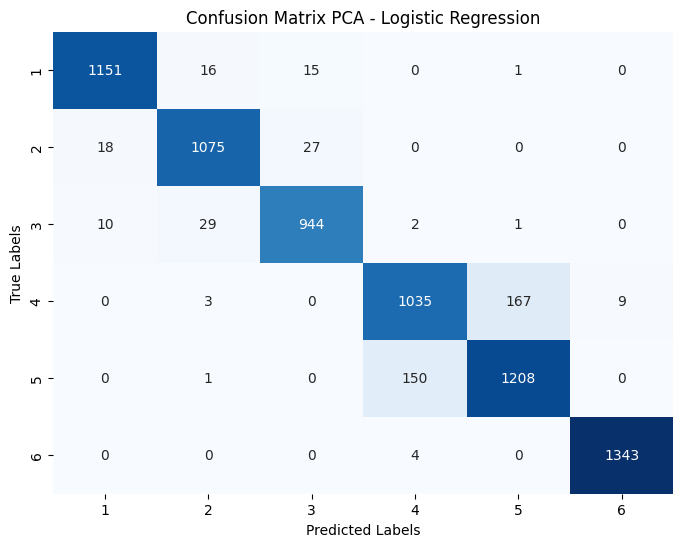

In [ ]:

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train_flat, y_pred_cv3)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_train_flat), yticklabels=np.unique(y_train_flat))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix PCA - Logistic Regression')
plt.show()